<a href="https://colab.research.google.com/github/Le4o/topicos-avancados-ic/blob/main/Avalia%C3%A7%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Temporais
#### Exercício da matéria de Tópicos Avançados em Inteligência Computacional

Grupo:
- João Victor de Sledz Bulhões
- Leonardo de Andrade Santana
- Lis da Silva Azevedo

### Definição do Exercício
Utilizaremos o banco de dados do Human Activity Recognition with Smartphones, que foi construído a partir das gravações dos participantes do estudo realizando atividades da vida diária enquanto carregavam um smartphone com sensores inerciais embutidos. Para cada registro no conjunto de dados, é fornecido:

- Aceleração triaxial do acelerômetro (aceleração total) e a aceleração corporal estimada.

- Velocidade angular triaxial do giroscópio.

- Um vetor de 561 atributos com variáveis de domínio de tempo e frequência.

- O rótulo da atividade.

### Objetivo:
* Construir um modelo robusto para classificação das atividades diárias, utilizando o banco de dados fornecido, em uma das seis ações disponíveis:
> 1. caminhar;
> 2. subir escadas;
> 3. descer escadas;
> 4. sentar;
> 5. ficar em pé;
> 6. deitar.

* Desenvolver 4 modelos, utilizando:
> 1. MLP
> 2. CNN
> 3. Rede Neural Recorrente
> 4. Arquitetura hibrida com a combinação das redes anteriore

* Considere a divisão entre treinamento, validação e teste de 50%, 25% e 25%, respectivamente.

* Utilizar como métricas: **precision, recall, specificity,
F1-Score e accuracy**, evidenciando que o modelo não sofreu de **over/underfitting**.

### Observação: 
*   *Apresentação de métricas, gráficos, são essenciais para entendimento dos modelos e justificativas.*
*   *Compare ao final em uma tabela e apresente que técnica obteve os melhores
resultados, discutindo-os à luz de seu conhecimento sobre o assunto, discutindo
se eram resultados esperados, se estão adequados, e os porquês.*

### Opcionais:

*   A utilização de redes neurais baseadas em transformers é opcional e adicionará **1,0 ponto extra** ao projeto.
*   A utilização de pré-processamento das séries com Wavelets OU transformadas de Fourier adicionará **1,0 ponto extra** ao projeto.


### Link:

* [Mais informações sobre os recursos estão disponíveis no site](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Datasets

Mounted at /content/drive/
/content/drive/My Drive/Datasets


In [ ]:
import numpy as np 
import pandas as pd 

## Carregando os dados

O dataset fornecido é segmentado em **70% treino e 30% teste**, porém a atividade pede para segmentar em: **50% treino, 25% validação e 25% teste.** Então nos primeiramente juntamos os dados.


In [ ]:
# Carregando os dados diretamente dos csvs do Human Activity Recognition with Smartphones
train_data = pd.read_csv('./uci_har_csvs/train.csv')
test_data = pd.read_csv('./uci_har_csvs/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

data = train_data.append(test_data)
data.shape

print(f'Shape of combined data is {data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)
Shape of combined data is (10299, 563)


## Analise inicial dos dados

O dataset possui 6 classes, sendo elas:


1.   Walking downstairs
2.   Walking Upstairs
3.   Walking
4.   Sitting
5.   Stading 
6.   Laying



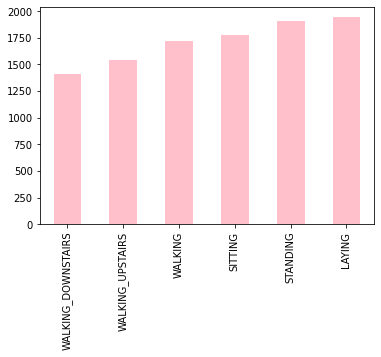

In [43]:
class_count = len(data['Activity'].unique())
data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [32]:
train, validate, test = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.5*len(data)), int(.75*len(data))])
              
print(f'Shape of train data is {train.shape}')
print(f'Shape of validation data is {validate.shape}')
print(f'Shape of test data is {test.shape}')
train.head()

Shape of train data is (5149, 563)
Shape of validation data is (2575, 563)
Shape of test data is (2575, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5804,0.202351,-0.021717,-0.111851,-0.332095,-0.114114,-0.309439,-0.382582,-0.161981,-0.308824,0.046627,-0.080060,-0.507483,0.275630,0.179982,0.279671,-0.226882,-0.774483,-0.847758,-0.783153,-0.464786,-0.419214,-0.337220,0.299194,0.248520,0.308393,-0.083773,-0.095324,0.361476,-0.110608,-0.126731,0.087686,0.213343,-0.074815,-0.391531,0.548476,-0.344194,-0.002450,-0.138590,-0.160088,0.057044,...,0.305859,-0.904762,0.280790,0.108334,-0.273964,-0.543972,-0.600422,-0.547632,-0.665569,-0.872649,-0.543972,-0.887938,-0.500558,0.496935,-0.589744,0.286247,-0.424845,-0.735574,-0.559849,-0.545961,-0.526840,-0.529618,-0.934321,-0.559849,-0.892957,-0.443799,0.415805,-0.904762,0.068494,0.005777,-0.313236,0.831735,0.495929,-0.021844,-0.621611,-0.843964,0.187828,-0.044740,26,WALKING
3688,0.282814,-0.016686,-0.110004,-0.994285,-0.973997,-0.988410,-0.994069,-0.978087,-0.989570,-0.938192,-0.569563,-0.805062,0.849412,0.672442,0.843429,-0.989757,-0.999954,-0.999771,-0.999777,-0.993230,-0.986070,-0.987647,-0.485685,-0.540288,-0.596279,0.280079,-0.206313,0.056897,0.078721,-0.124651,0.063927,0.050518,0.289955,0.089253,-0.054967,0.070126,0.099666,0.116684,-0.225904,-0.636409,...,-1.000000,-0.809524,0.161835,-0.654476,-0.942112,-0.983364,-0.980910,-0.977646,-0.984225,-0.997516,-0.983364,-0.999731,-0.984269,-0.671366,-1.000000,-0.289716,-0.525437,-0.821969,-0.989797,-0.987181,-0.988234,-0.987283,-0.993587,-0.989797,-0.999899,-0.989580,-0.895847,-0.968254,-0.076563,0.037980,-0.366579,0.072845,-0.622912,-0.090463,0.313810,0.592963,-0.576030,-0.428127,19,LAYING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,-0.564290,-0.821296,0.849753,0.686588,0.840875,-0.987390,-0.999976,-0.999771,-0.999679,-0.996962,-0.972932,-0.982118,-0.751029,-0.595825,-0.615634,0.179165,-0.117050,0.148687,-0.082409,0.188682,-0.102966,0.059483,-0.078121,0.187768,-0.106895,0.010262,0.092770,0.049340,0.171381,0.458159,...,-1.000000,-0.968254,0.382158,-0.764742,-0.973118,-0.995873,-0.995513,-0.995051,-0.995946,-0.996275,-0.995873,-0.999973,-0.994379,-0.9

# MLP
Criando modelo de MLP

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [48]:
# Separando os os dados do target
x_train, y_train = train.iloc[:, :-2], train.iloc[:, -1:]
x_test, y_test = test.iloc[:, :-2], test.iloc[:, -1:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5149, 561), (5149, 1), (2575, 561), (2575, 1))

In [56]:
# Trasformando as strings do target em números
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# --------------Não sei oq é isso
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [59]:
# Criando o model
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal', activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal', activation='softmax'))

# Compilando o model e treinando
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
81/81 [==============================] - 1s 5ms/step - loss: 1.4176 - accuracy: 0.4172 - val_loss: 1.1291 - val_accuracy: 0.4322
Epoch 2/20
81/81 [==============================] - 0s 3ms/step - loss: 1.0338 - accuracy: 0.6182 - val_loss: 0.9183 - val_accuracy: 0.8276
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.7568 - val_loss: 0.6984 - val_accuracy: 0.8241
Epoch 4/20
81/81 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.8054 - val_loss: 0.5510 - val_accuracy: 0.8800
Epoch 5/20
81/81 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.8363 - val_loss: 0.4534 - val_accuracy: 0.8913
Epoch 6/20
81/81 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8586 - val_loss: 0.3867 - val_accuracy: 0.8986
Epoch 7/20
81/81 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.8743 - val_loss: 0.3368 - val_accuracy: 0.8920
Epoch 8/20
81/81 [==